# **Deep Learning** _Day 119_
##### Name: Muhammad Hassaan
##### Date: August 28, 2024
##### Email: muhammadhassaan7896@gmail.com

# **LSTM for Time Series Prediction**

In this notebook, we will demonstrate how to use Long Short-Term Memory (LSTM) neural networks for time series prediction.

This notebook, when executed, will:

* Load and visualize the Airline Passengers dataset.
* Preprocess the data by normalizing it and splitting it into training and testing sets.
* Create input-output pairs for training/testing with a certain timestep.
* Build an LSTM model and train it on the prepared data.
* Evaluate the model by computing its RMSE on the training and testing data.
* Visualize the true data vs. the model's predictions.

In [11]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

## Data Preparation
First, let's load and visualize the Airline Passengers dataset.

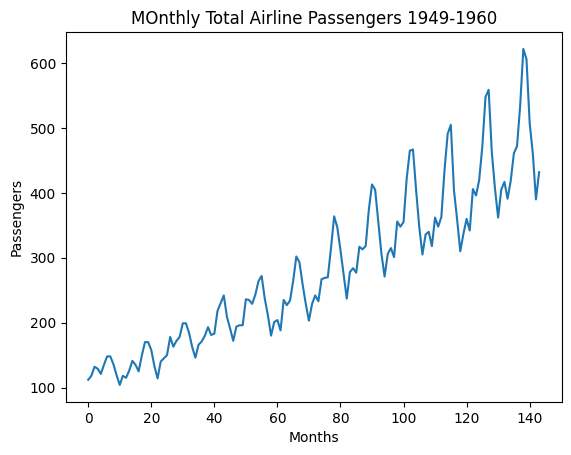

In [12]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"

df = pd.read_csv(url, usecols=[1], engine='python')
plt.plot(df)
plt.xlabel("Months")
plt.ylabel("Passengers")
plt.title("MOnthly Total Airline Passengers 1949-1960")
plt.show()

## Data Preprocessing
Before training an LSTM model, we need to preprocess our data. This involves scaling our data and converting it into the right shape.

In [13]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(df.values.astype('float32'))

# split that data into train and test sets
train_size = int(len(scaled_df) * 0.67)
test_size = len(scaled_df) - train_size
train, test = scaled_df[0:train_size,:], scaled_df[train_size:len(scaled_df),:]

## Create Dataset Matrix
This utility function creates a dataset matrix. Given data, and choosing a certain time step, it will create input-output pairs.

In [14]:
def create_ds(scaled_df, look_back=1):
    X, Y = [], []
    for i in range(len(scaled_df) - look_back - 1):
        a = scaled_df[i:(i + look_back), 0]
        X.append(a)
        Y.append(scaled_df[i + look_back, 0])
    return np.array(X), np.array(Y)

# reshape into X=t and Y=t+1, shoosing a timestamp of 3
look_back=3
X_train, y_train = create_ds(train, look_back)
X_test, y_test = create_ds(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

## LSTM Model Building & Training

In [15]:
# create a LSTM model
model = Sequential([
    LSTM(4, input_shape=(look_back, 1)),
    Dense(1)
])

model.summary()

c:\Users\muham\miniconda3\envs\tf_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 4)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
# compile the model 
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0073 - loss: 0.0336
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0060 - loss: 0.0071
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 7.1440e-04 - loss: 0.0082
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0140 - loss: 0.0048
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0012 - loss: 0.0051    
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0353 - loss: 0.0052
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0128 - loss: 0.0049
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0180 - loss: 0.0046
Epoch 9/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 9.6302e-04 - loss: 0.0040
Epoch 10/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0013 - loss: 0.0034    
Epoch 11/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0052 - loss: 0.0042
Epoch 12/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/

## Model Evaluation

In [17]:
# make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# invert predictions
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])

# calculate root mean squared error
trainScore = np.sqrt(((train_predictions-y_train)**2).mean())
testScore = np.sqrt(((test_predictions-y_test)**2).mean())
print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Train Score: 95.00 RMSE
Test Score: 100.37 RMSE


## Visualizing Predictions

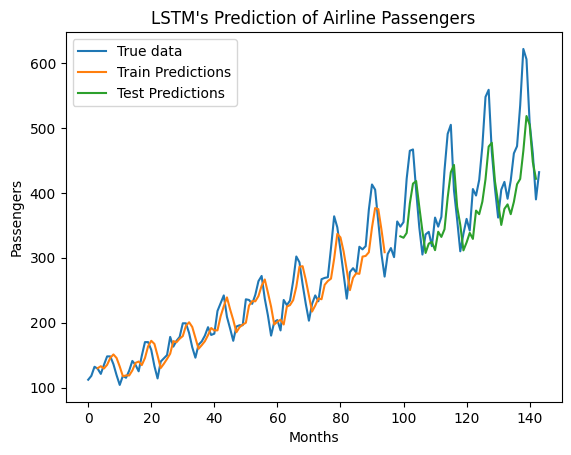

In [18]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(scaled_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predictions)+look_back, :] = train_predictions

# Shift test predictions for plotting
testPredictPlot = np.empty_like(scaled_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predictions)+(look_back*2)+1:len(scaled_df)-1, :] = test_predictions

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(scaled_df), label="True data")
plt.plot(trainPredictPlot, label="Train Predictions")
plt.plot(testPredictPlot, label="Test Predictions")
plt.xlabel("Months")
plt.ylabel("Passengers")
plt.title("LSTM's Prediction of Airline Passengers")
plt.legend()
plt.show()